# Project: Implementation of Random Forests in a Classification problem

Random Forest is a supervised learning machine learning algorithm. It consists of multiple Decision Trees.
Random forests algorithm creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. While this process takes place, the feature importances of each classification surface.

## The Algorithm
There are 4 steps in this algorithm:
1. Random selection of data from the training set in form of samples
2. Construct a Decision tree for each selected sample
3. Score out each Decision tree 
4. Select the prediction result with the Highest as the final prediction

## Advantages of Random Forests 
1. highly accurate and robust method because of the quantity of decision trees that make the entire classifier
2. Does not suffer overfitting because all prediction values are averaged
3. Classification and regression problems both can be handled by the Random Forest
4. Random forests can also handle missing values
5. Gives an idea of feature importance

## Data Description
The data which we will be dealing with in this example is the famous Titanic Survival data.
The Titanic was the world's biggest ship to ever sail. It carried over  3,300 passengers.
Unfortunately, it met with an accident and due to poor disaster planning, people died in the shipwreck
The goal is to find if a passenger of the Titanic survived the shipwreck, given some data about these passengers(eg their class and how much their fare).

We will be using scikit learn to train our model in python and matplotlib for visualization.


### Features of the data
1. pclass = A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

2. age = Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
3. sibsp = The dataset defines family relations
4. parch: The dataset defines family relations
5. Survived  = 1 if the person survived, 0 if the person doesnot survive
6. Embarked = where the person boarded the ship 
7. sex = gender of the person
8. Fare = price of ticket paid by the passenger


# Code

In [2]:
# importing libraries
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [3]:
#loading the data
df = pd.read_csv('data.csv')
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [4]:
# Splitting our X and y, features  and answers
X = df[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age',
        'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y = df['Survived']

As we can see, there are a few columns that might not play a part in deciding whether a passenger survived
eg. PassengerId is just an index number and does not affect if the passenger survived or not. Likewise the name of the person also does not play a role in the passenger's survival.


In [5]:
# Dropping or removing all the columns that have no relations with the answer
X = X.drop(['PassengerId', 'Embarked', 'Name', 'Ticket', 'Cabin'], axis=1)

In [6]:
# Encoding the gender variable because it has string values, while the classifier model takes only numerical format
# All males will be 1 and all females will be 0 or vice versa
le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])

Feature 0 : Pclass, Score: 0.11342
Feature 1 : Sex, Score: 0.30525
Feature 2 : Age, Score: 0.23370
Feature 3 : SibSp, Score: 0.04853
Feature 4 : Parch, Score: 0.01377
Feature 5 : Fare, Score: 0.28533


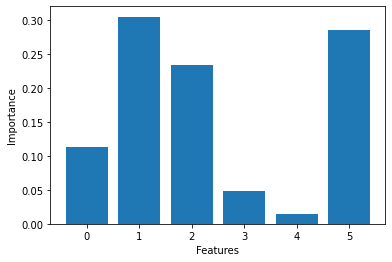

In [7]:
# Simple imputation to fill in all missing values, we will be filling it with mean values in the column
X = X.fillna(X.mean())

# Feature Engineering  - Understanding which features play a role in passenger survival the most
model = DecisionTreeClassifier()
model.fit(X, y)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print('Feature %d : %s, Score: %.5f' % (i, X.columns[i], v))
featurevsimp = plt.bar([x for x in range(len(importance))], importance)
featurevsimp = plt.xlabel("Features")
featurevsimp = plt.ylabel("Importance")
plt.show()

We come to know that the most important features that decide the output, we can drop the low score columns. But for the sake of simplicity, we can consider those columns

In [8]:
# Splitting the data into training and testing data (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=42)

In [10]:
# Model defination

# We need to choose how many trees are ideal in solving the problem. Too many trees in the Random forest classifier

estimators = [10, 20, 40, 50, 100, 200, 300, 400]
scores = []
temp = {}

for estimator in estimators:
    clf = RandomForestClassifier(n_estimators=estimator) # preparing the model classifier
    clf.fit(X_train, y_train)                            # Fitting the model to the training data
    y_pred = clf.predict(X_test)                         # prediction on the testing data
    score = metrics.accuracy_score(y_test, y_pred)       # scoring how well the model performed 
    scores.append(score)
    temp[score] = estimator

We trained the model on a set of estimators, which are the number of trees the Random Forest consists of. The Lesser the number of trees, lesser features are picked, the more the number of trees, more intensively the features are picked.

In [13]:
# printing the results and the final take on the model
bestEstimator = temp[max(scores)]
clf = RandomForestClassifier(n_estimators=bestEstimator)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred.tolist())
print(y_test.values.tolist())
print("Accuracy : ", max(scores) * 100, "%")
print("Total Test Cases : ", len(y_pred))
print("Correct Predictions : ",  (max(scores) * len(y_pred)))
print("Wrong Predictions : ",  len(y_pred) - (max(scores) * len(y_pred)))

[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 

## Conclusion
We have successfully built a model to classify the titanic dataset. The model can classify people who survived and people who died with an accuracy of 80%.

Random forests present estimates for variable importance, i.e., neural nets. They also offer a superior method for working with missing data. Missing values are substituted by the variable appearing the most in a particular node. Among all the available classification methods, random forests provide the highest accuracy.

The random forest technique can also handle big data with numerous variables running into thousands. It can automatically balance data sets when a class is more infrequent than other classes in the data. The method also handles variables fast, making it suitable for complicated tasks.